In [1]:
### ------------ Breast Cancer Classification 

In [2]:
## Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
## For Standardising the columns
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
## Implementing Decision Tree
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [3]:
## Loading the dataset
cancer_dataset = pd.read_csv("/Users/sonamtripathi/Desktop/My_Data/My_Work/ML_projects/Beast_Cancer_classification/breast_cancer_classification.csv")

In [4]:
## Saving a copy of the dataset
cancer_dataset_copy = cancer_dataset

### ----- OverView of the Dataset --------- 

In [5]:
print(cancer_dataset_copy.shape)
cancer_dataset_copy.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
## Checking for null values in the dataset
cancer_dataset_copy.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
## Counting the number of observation of each type of cancer
cancer_dataset_copy['diagnosis'].value_counts()
# This shows that the dataset is almost balanced

B    357
M    212
Name: diagnosis, dtype: int64

### -------- Converting the "B" and "M" to numeric variables 

In [8]:
# Convert the "Churn Column "  into '0] and '1'
# Before transforming this convert the "churn" column to numeric
class_mapping = {label:idx for idx,label in enumerate(np.unique(cancer_dataset_copy['diagnosis']))}
class_mapping

{'B': 0, 'M': 1}

In [9]:
# Mapping the "Churn" encoding with the churn column
cancer_dataset_copy['diagnosis'] = cancer_dataset_copy['diagnosis'].map(class_mapping)

In [10]:
cancer_dataset_copy.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
## Checking the datatype of columns
cancer_dataset_copy.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
## summary of the columns in the dataset
cancer_dataset_copy.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### --------- Scaling and Visualization 

Before Visualising the Data it is necessary to Standardise the Data as it may affect the Results.

In [13]:
## Standardising the Data so that all the features are in same scale

In [14]:
### REMOVING THE FEATURES WHICH ARE NOT RELEVANT FOR PREDICTING THE CANCER TYPES --- LIKE ID

In [15]:
## Separating the Features and the Target variables
cancer_feature_data_x = cancer_dataset_copy.drop(['id','diagnosis'],axis = 1)
cancer_feature_data_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
cancer_target_data_y = cancer_dataset_copy[['diagnosis']]
cancer_target_data_y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [17]:
std_scale_cancer_data = preprocessing.StandardScaler().fit(cancer_feature_data_x)
df_std_scale_cancer_data = std_scale_cancer_data.transform(cancer_feature_data_x)

In [18]:
type(df_std_scale_cancer_data)

numpy.ndarray

In [19]:
df_std_scale_cancer_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
cancer_data_dt = pd.DataFrame(df_std_scale_cancer_data)
print(type(cancer_data_dt))

<class 'pandas.core.frame.DataFrame'>


In [21]:
cancer_data_dt.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [22]:
## Adding column names to the dataset
cancer_data_features_names = list(cancer_feature_data_x)
cancer_data_features_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [23]:
# Rename the column name
cancer_data_dt.columns = cancer_data_features_names

In [24]:
cancer_data_dt.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
## Concatenating the Dataframe
final_cancer_scaled_data = pd.concat([cancer_target_data_y,cancer_data_dt], axis = 1)
final_cancer_scaled_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [26]:
## Saving the copy of the dataset
final_cancer_scaled_data_copy = final_cancer_scaled_data

### --------- CORRELATION OF FEATURES WITH THE TARGET VARIABLES ---- 

<Figure size 1600x1280 with 0 Axes>

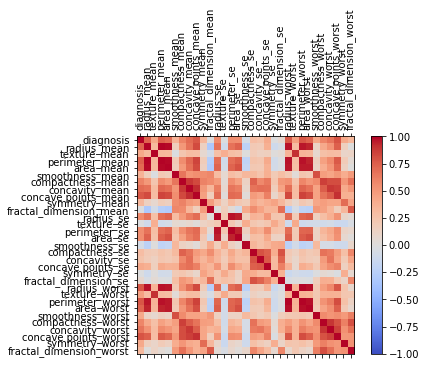

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
corr = final_cancer_scaled_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(final_cancer_scaled_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(final_cancer_scaled_data.columns)
ax.set_yticklabels(final_cancer_scaled_data.columns)
plt.show()

In [28]:
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [29]:
## Features which has value greater than 0.5 are consider as significant variables

### ------- Splitting the Dataset into Train and Test set 

In [30]:
## Splitting the dataset into 80/20
train_data, test_data = train_test_split(final_cancer_scaled_data_copy, test_size = 0.2, random_state = 42)

In [31]:
## Checking the shape of the dataset
print("Shape of Train Dataset", train_data.shape)
print("Shape of Test Dataset", test_data.shape)

## Checking the Datatype of the dataset
print(type(train_data))
print(type(test_data))

Shape of Train Dataset (455, 31)
Shape of Test Dataset (114, 31)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
train_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
181,1,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,...,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465
63,0,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,...,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877
248,0,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,...,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199
60,0,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,...,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578


In [33]:
## Counting Cancer Types in each splitted dataset
print("Train dataset", train_data.groupby(['diagnosis']).size())
print("Test dataset", test_data.groupby(['diagnosis']).size())

Train dataset diagnosis
0    286
1    169
dtype: int64
Test dataset diagnosis
0    71
1    43
dtype: int64


In [34]:
## Separting the feature and the traget variable from train data
x_train_data = train_data.drop(['diagnosis'],axis = 1)
y_train_data = train_data[['diagnosis']]

In [35]:
x_train_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,1.585220,...,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,0.968562,...,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,0.069801,...,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578


In [36]:
y_train_data.head()

,diagnosis
68,0
181,1
63,0
248,0
60,0


In [37]:
## Separting the feature and the traget variable from test data
x_test_data = test_data.drop(['diagnosis'], axis = 1)
y_test_data = test_data[['diagnosis']]

### -------- Applying Classification Models 

## 1. Logistic Regression 

In [38]:
logistic_regression = LogisticRegression()

In [39]:
logistic_model = logistic_regression.fit(x_train_data,y_train_data)

/Users/sonamtripathi/env-demo/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
logistic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
## Predicting on the test dataset
y_logistic_pred = logistic_model.predict(x_test_data)
y_logistic_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

### -------- ACCURACY EVALUATION --------- 

#### --------- CONFUSION MATRIX ------------- 

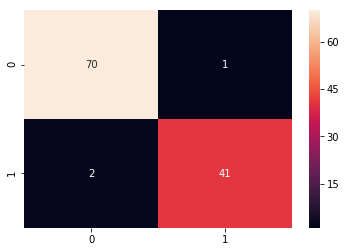

In [42]:
logistic_confusion_matrix = confusion_matrix(y_test_data, y_logistic_pred)
sns.heatmap(logistic_confusion_matrix, annot = True, fmt = "d")

#### --------- ACCURACY, PRECISION AND RECALL SCORE ------------ 

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test_data, y_logistic_pred))
print("Precision:", metrics.precision_score(y_test_data, y_logistic_pred))
print("Recall:",metrics.recall_score(y_test_data, y_logistic_pred))

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233


#### ---------- ROC CURVE ------------ 

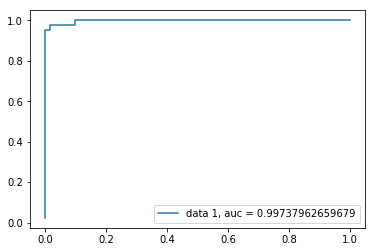

In [45]:
y_logistic_pred_proba = logistic_model.predict_proba(x_test_data)[::,1] ## "[::,1]" is used to take only "probability of happening that event"
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_logistic_pred_proba)
logistic_auc = metrics.roc_auc_score(y_test_data, y_logistic_pred_proba)
plt.plot(fpr,tpr,label = "data 1, auc = "+str(logistic_auc))
plt.legend(loc = 4)
plt.show()

#### ----------- Important Features from Logistic Regression Model 

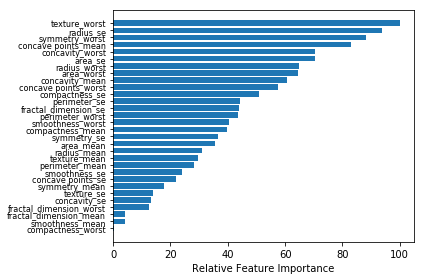

In [137]:
feature_importance = abs(logistic_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train_data.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()


### 2. Decision Tree Model 

#### Finding Best Tree Depth with the help of Cross - Validation

In [73]:
cv = KFold(n_splits = 5) # Desired number of cross validation folds
accuracies = list()
max_attributes = len(list(test_data))
depth_range = range(1, max_attributes + 1)

In [74]:
type(train_data)
train_data.shape

(455, 31)

In [113]:
max_attributes = len(list(test_data))
depth_range = range(1, max_attributes + 1)
x = x_train_data
y = y_train_data

# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
accuracy = []

for i in depth_range:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    # Perform 10 -fold cross validation 
    scores = cross_val_score(estimator = clf, X = x, y = y, cv = 10, n_jobs = 4)
    accuracy.append((i,scores.mean()))

## Converting list of Tuples to pandas Dataframe
df = pd.DataFrame(accuracy, columns=['Depth', 'Accuracy'])
df

,Depth,Accuracy
0,1,0.887811
1,2,0.912018
2,3,0.936221
3,4,0.938395
4,5,0.942841
5,6,0.934097
6,7,0.927429
7,8,0.929603
8,9,0.927330
9,10,0.927330


In [ ]:
## This Gives us the idea that 4 is the optimal depth with mean accuracy of 94%

#### ---------- Final Tree 

In [114]:
## Create Decision Tree with max depth = 4
decision_tree_model = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree_model.fit(x_train_data, y_train_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
data_features_name = list(x_train_data)
data_features_name

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [124]:
target_name = list(y_train_data)
target_name

['diagnosis']

In [116]:
## Predicting the Results in the test dataset
y_decision_tree_pred = decision_tree_model.predict(x_test_data)

In [128]:
import pydotplus
#from sklearn.datasets import load_iris
from sklearn import tree
import collections

dot_data = tree.export_graphviz(decision_tree_model,
                                feature_names=data_features_name,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

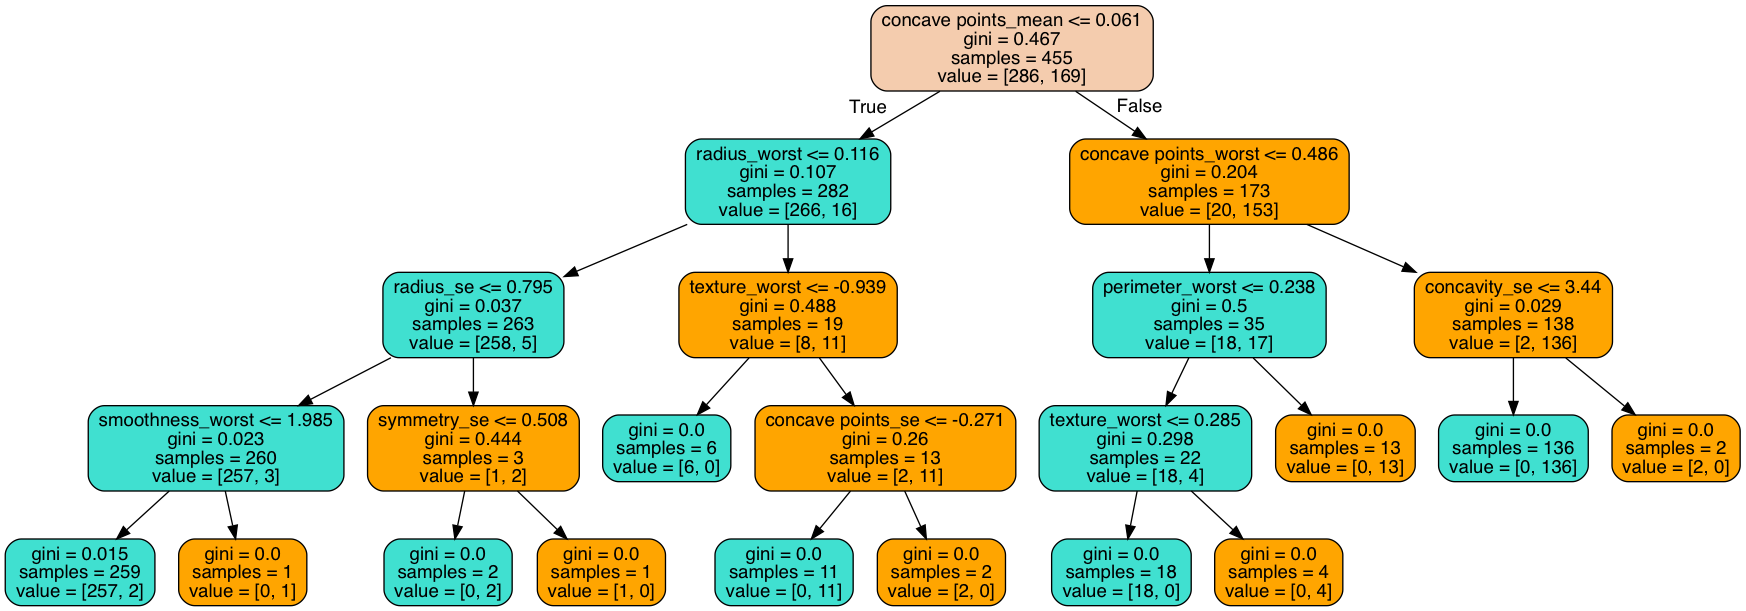

In [130]:
## Plotting the Decsion Tree
from IPython.display import Image as PImage
PImage("tree.png")

In [ ]:
## Checking the Accuracy of the model

In [134]:
print("Accuracy:", metrics.accuracy_score(y_test_data, y_decision_tree_pred))
print("Precision:", metrics.precision_score(y_test_data, y_decision_tree_pred))
print("Recall:",metrics.recall_score(y_test_data, y_decision_tree_pred))

Accuracy: 0.9385964912280702
Precision: 0.9285714285714286
Recall: 0.9069767441860465


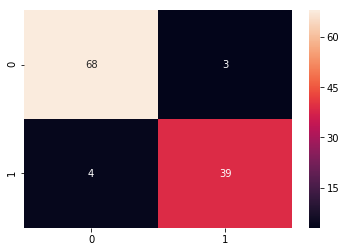

In [135]:
decision_confusion_matrix = confusion_matrix(y_test_data, y_decision_tree_pred)
sns.heatmap(decision_confusion_matrix, annot = True, fmt = "d")

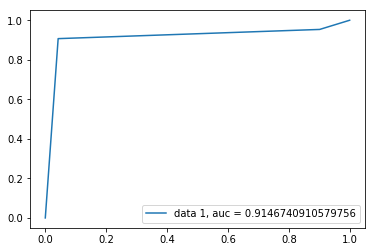

In [138]:
y_decision_pred_proba = decision_tree_model.predict_proba(x_test_data)[::,1] ## "[::,1]" is used to take only "probability of happening that event"
fpr, tpr, _ = metrics.roc_curve(y_test_data,  y_decision_pred_proba)
decision_tree_auc = metrics.roc_auc_score(y_test_data, y_decision_pred_proba)
plt.plot(fpr,tpr,label = "data 1, auc = "+str(decision_tree_auc))
plt.legend(loc = 4)
plt.show()

In [139]:
for name, importance in zip(x_train_data.columns, decision_tree_model.feature_importances_):
    print(name, importance)


radius_mean 0.0
texture_mean 0.0
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.0
compactness_mean 0.0
concavity_mean 0.0
concave points_mean 0.7045825245937555
symmetry_mean 0.0
fractal_dimension_mean 0.0
radius_se 0.012210693134818826
texture_se 0.0
perimeter_se 0.0
area_se 0.0
smoothness_se 0.0
compactness_se 0.0
concavity_se 0.018907699251207017
concave points_se 0.016234099243966203
symmetry_se 0.00639525121732002
fractal_dimension_se 0.0
radius_worst 0.053294921965051284
texture_worst 0.05959093672023958
perimeter_worst 0.052474282066269966
area_worst 0.0
smoothness_worst 0.009408968242933616
compactness_worst 0.0
concavity_worst 0.0
concave points_worst 0.06690062356443802
symmetry_worst 0.0
fractal_dimension_worst 0.0
